<a href="https://colab.research.google.com/github/KIRCHEVSKI/Test-Project-/blob/main/DIPLOMCHIk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv, DataFrame
%matplotlib inline
import scipy.integrate as integrate
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import math
import time
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = '/content/CoalCSV (1).csv'
df = pd.read_csv(dataset)
df = df[['Coal']]
print(df)
print(df.info)

# Формирование обучающей выборки
# Определение размера обучающей выборки
size_train = math.ceil(len(df) * .85)
size_train

#Разделение дата сета на обучающу и тестовую выборки
train_data_df = df[:size_train].iloc[:,:1]
test_data_df = df[size_train:].iloc[:,:1]
print(train_data_df.shape, test_data_df.shape)

# Приведение данных из датафрейма в массив
train_data = train_data_df.Coal.values
test_data = test_data_df.Coal.values
# Изменения массива из 1D в 2D
train_data = np.reshape(train_data, (-1,1))
test_data = np.reshape(test_data, (-1,1))
train_data


     Coal
0    9.47
1    8.13
2    7.87
3    7.21
4    7.61
..    ...
463  7.43
464  7.63
465  8.48
466  8.56
467  9.30

[468 rows x 1 columns]
<bound method DataFrame.info of      Coal
0    9.47
1    8.13
2    7.87
3    7.21
4    7.61
..    ...
463  7.43
464  7.63
465  8.48
466  8.56
467  9.30

[468 rows x 1 columns]>
(398, 1) (70, 1)


array([[ 9.47],
       [ 8.13],
       [ 7.87],
       [ 7.21],
       [ 7.61],
       [ 7.13],
       [ 8.05],
       [ 7.75],
       [ 7.48],
       [ 7.13],
       [ 7.16],
       [ 9.46],
       [ 7.38],
       [ 8.31],
       [ 7.17],
       [ 9.53],
       [ 9.97],
       [ 7.45],
       [ 8.95],
       [ 7.45],
       [ 8.8 ],
       [ 8.56],
       [ 9.98],
       [ 7.21],
       [ 7.3 ],
       [ 6.28],
       [ 6.93],
       [ 7.17],
       [ 8.68],
       [ 7.67],
       [ 7.81],
       [ 8.02],
       [ 8.17],
       [ 8.33],
       [ 8.03],
       [ 8.59],
       [ 7.61],
       [ 7.41],
       [ 7.76],
       [ 7.7 ],
       [ 8.42],
       [ 8.92],
       [ 7.48],
       [ 9.56],
       [ 9.41],
       [ 8.11],
       [ 7.98],
       [ 6.77],
       [ 6.57],
       [ 7.73],
       [ 8.09],
       [ 8.13],
       [ 8.26],
       [ 8.64],
       [ 7.49],
       [ 8.79],
       [ 7.34],
       [ 8.69],
       [ 8.94],
       [ 9.41],
       [ 7.17],
       [ 9.43],
       [

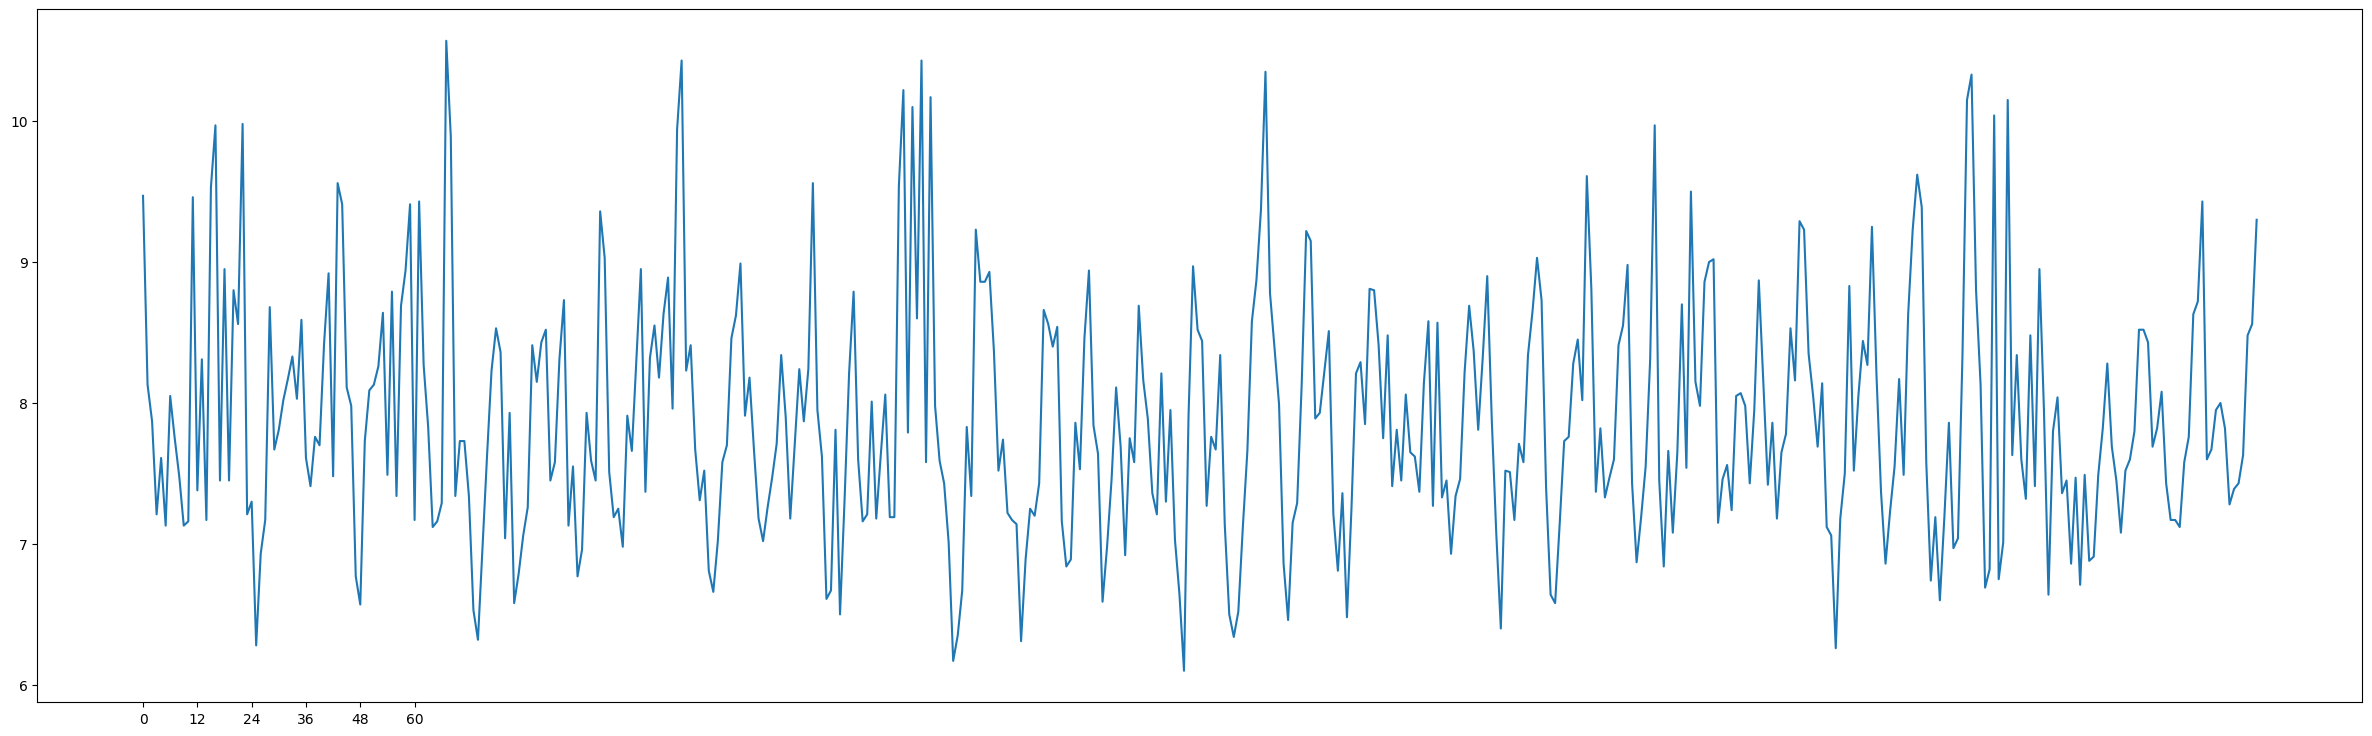

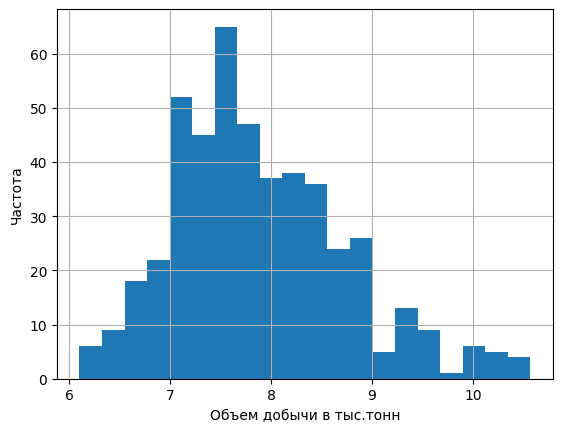

adf:  -10.403766132787482
p-value:  1.8798623951388763e-18
единичных корней нет, ряд стационарен


In [ ]:
# Выводим информатирующие графики по датасету
plt.figure(figsize=(30,9))
plt.plot(df['Coal'])
plt.xticks(np.arange(0,72,12))
plt.ylabel('')
plt.xlabel('')

plt.figure()
(df['Coal'].hist(bins = 20))
plt.xlabel('Объем добычи в тыс.тонн')
plt.ylabel('Частота')
plt.show()

# подтверждение стационарности
test = sm.tsa.adfuller(df['Coal'])
print('adf: ', test[0])
print('p-value: ', test[1])
if test[0] > test[1]:
  print("есть единичные корни, ряд не стационарен")
else:
  print("единичных корней нет, ряд стационарен")

In [ ]:
df.describe()

,Coal
count,468.000000
mean,7.884444
std,0.846590
min,6.100000
25%,7.277500
50%,7.735000
75%,8.410000
max,10.570000


from matplotlib import pyplot as plt
_df_0['Coal'].plot(kind='hist', bins=20, title='Coal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Coal'].plot(kind='line', figsize=(8, 4), title='Coal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Coal'].plot(kind='hist', bins=20, title='Coal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Coal'].plot(kind='line', figsize=(8, 4), title='Coal')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='Coal', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Создаем простой минмаксный скейлер для нормализации данных
scaler = MinMaxScaler(feature_range=(0,1))
# Тренируем скейлер и нормализуем обучающую выборку
train_data = scaler.fit_transform(train_data)
print(train_data[:5])

[[0.75391499]
 [0.4541387 ]
 [0.39597315]
 [0.24832215]
 [0.33780761]]


In [ ]:
# Нормализуем тестовую выборку
test_data = scaler.transform(test_data)
print(test_data[:5])

[[0.24384787]
 [0.39373602]
 [0.19463087]
 [0.21029083]
 [0.50111857]]


In [ ]:
# Подготавливаем данные к обучению
# Создаем массивы для входных данных и выходных
X_train = []
y_train = []
for i in range(6, len(train_data)):
	# В массив входных данных помещается показатели 6 предыдущих месяцев
	X_train.append(train_data[i-6:i, 0])
	# В массив выходных данных помещается показатель за текущей месяц
	y_train.append(train_data[i, 0])

# Переводим в numpy массивы, с которыми работает нейросеть
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train[0])
print(y_train[0])


[0.75391499 0.4541387  0.39597315 0.24832215 0.33780761 0.23042506]
0.4362416107382552


In [ ]:
# То же проделываем с тестовой выборкой
X_test = []
y_test = []
for i in range(6, len(test_data)):
	X_test.append(test_data[i-6:i, 0])
	y_test.append(test_data[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test[0])
print(y_test[0])

[0.24384787 0.39373602 0.19463087 0.21029083 0.50111857 0.90604027]
0.9463087248322148


In [ ]:
# Импортируем библиотеки для нейросетей
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Пояснения по выбору гиперпараметров

Количество слоев: меньшее количество предсказывает общий тренд, но не учитывает сезонные и прочие изменения

Количество нейронов: подобрано с учетом оптимального соотношения времени обучения и объема модели

Функция активации на выходном нейроне: не смотря на то, что данные нормализованны от 0 до 1, предсказанные данные могут быть как больше 1, так и меньше 0, следуя тренду данных, поэтому используется функция допускающая подобные значения

Оптимизатор и функция ошибки: используются стандартные для задач предсказания временных рядов

Параметры компиляции: размер batch выбран, исходя из скорости обучения модели, количество эпох методом проб, был выбран момент после которого скорость обучения модели снижается и модель постепенно перестает обучаться и начинает переобучаться


Epoch 1/50
25/25 [==============================] - 3s 8ms/step - loss: 0.1124
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0453
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0391
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0458
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0382
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0364
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0352
Epoch 8/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0320
Epoch 9/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0384
Epoch 11/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0361
Epoch 12/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0337
Epoch 13/50
25/25 [===========================

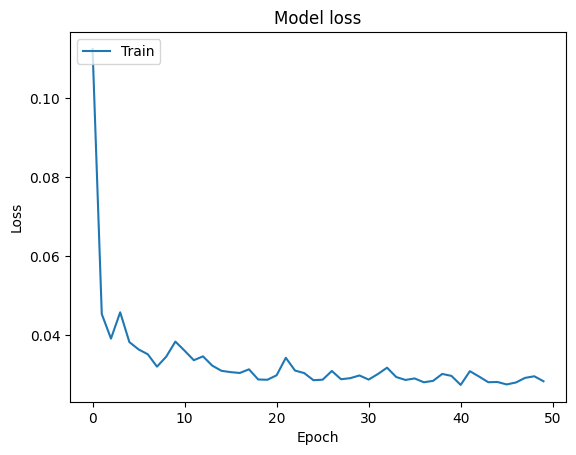

In [ ]:
# Инициализация нейронной сети
regressorRNN = Sequential()

# Добавляем входной слой RNN, устанавливаем разммер входных данных 6
regressorRNN.add(SimpleRNN(units = 64,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))

# Добавляем Dropuot слой для предотвращения переобучения
regressorRNN.add(Dropout(0.2))

# Добавляем еще RNN слои
regressorRNN.add(SimpleRNN(units = 64,
						activation = "tanh",
						return_sequences = True))

regressorRNN.add(SimpleRNN(units = 64))

# Добавляем выходной слой с 1 нейронном
regressorRNN.add(Dense(units = 1, activation='relu'))

# Компилируем модель
regressorRNN.compile(optimizer = 'Adam',
					loss = 'mean_squared_error')

# Обучаем модель и засекаем время на обучение модели
time_start_fitRNN = time.time()
history = regressorRNN.fit(X_train, y_train, batch_size=16, epochs=50)
time_end_fitRNN = time.time()
regressorRNN.summary()

# Сохраняем из истории обучения показатели ошибки
lossRNN = history.history['loss']

# Строим график ошибки в процессе обучения
plt.plot(lossRNN)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()


1/1 [==============================] - 0s 23ms/step


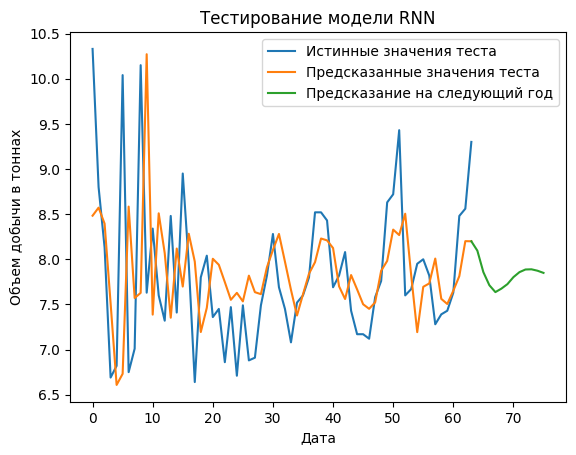

In [ ]:
# Выполняем предсказание на тестовой выборке
predictRNN_test = regressorRNN.predict(X_test)

# Формируем предсказание на еще один год
# Берем последнее значение из тестовой выборки
temp_x = X_test[-1:]
predictRNN = []
# В цикле пробегаемся по 13 месяцам, последний прошлого года и 12 следующего
for i in range(13):
    # Делаем предсказание на следующий месяц
    predictRNN.append(regressorRNN.predict(temp_x)[0, 0])
    # Изменяем данные на которых делаем предсказание
    # Откидываем самый ранний месяц из начала
    # И добавляем данные за предсказанный месяц в конец
    temp_x = np.append(temp_x[0][1:], predictRNN[-1]).reshape((1, 6))
predictRNN = np.array(predictRNN)

# Строим график для тестовой выборки и еще одного года
date = range(y_test.shape[0])
predict_date =  range(y_test.shape[0]-1, y_test.shape[0] + predictRNN.shape[0]-1)
plt.plot(date, scaler.inverse_transform(y_test.reshape((y_test.shape[0], 1))))
plt.plot(date, scaler.inverse_transform(predictRNN_test.reshape((y_test.shape[0], 1))))
plt.plot(predict_date, scaler.inverse_transform(predictRNN.reshape((predictRNN.shape[0], 1))))
plt.title('Тестирование модели RNN')
plt.ylabel('Объем добычи в тоннах')
plt.xlabel('Дата')
plt.legend(['Истинные значения теста','Предсказанные значения теста', 'Предсказание на следующий год'], loc = 'upper right')
plt.show()

Пояснения по выбору гиперпараметров

Количество слоев: меньшее количество предсказывает общий тренд, но не учитывает сезонные и прочие изменения, так же был добавлен дополнительный простой слой чтобы ускорить процесс выделения признаков из данных с lstm слоев

Количество нейронов: подобрано с учетом оптимального соотношения времени обучения и объема модели

Функция активации на выходном нейроне: не смотря на то, что данные нормализованны от 0 до 1, предсказанные данные могут быть как больше 1, так и меньше 0, следуя тренду данных, поэтому используется функция допускающая подобные значения

Оптимизатор и функция ошибки: используются стандартные для задач предсказания временных рядов

Параметры компиляции: размер batch выбран, исходя из скорости обучения модели, количество эпох методом проб, был выбран момент после которого скорость обучения модели снижается и модель постепенно перестает обучаться и начинает переобучаться

Epoch 1/200
25/25 [==============================] - 5s 7ms/step - loss: 0.0620
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0387
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0370
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0372
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0356
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0349
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0346
Epoch 8/200
25/25 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 9/200
25/25 [==============================] - 0s 10ms/step - loss: 0.0338
Epoch 10/200
25/25 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 11/200
25/25 [==============================] - 0s 10ms/step - loss: 0.0311
Epoch 12/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0319
Epoch 13/200
25/25 [=============

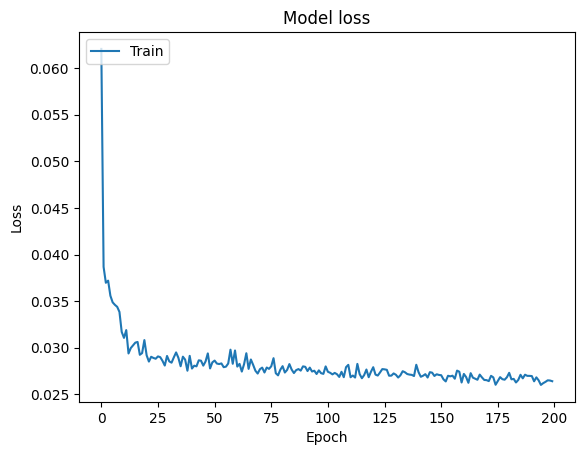

In [ ]:
# Инициализация нейронной сети
regressorLSTM = Sequential()

# Добавляем входной слой LSTM, устанавливаем разммер входных данных 6
regressorLSTM.add(LSTM(64,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))

# Добавляем Dropuot слой для предотвращения переобучения
regressorLSTM.add(Dropout(0.2))

# Добавляем еще LSTM слои
regressorLSTM.add(LSTM(64,
                       return_sequences = False))

# Добавляем дополнительный простой слой
regressorLSTM.add(Dense(256))

# Добавляем выходной слой с 1 нейронном
regressorLSTM.add(Dense(1))

# Компилируем модель
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error')

# Обучаем модель и засекаем время на обучение модели
time_start_fitLSTM = time.time()
history = regressorLSTM.fit(X_train,
                  y_train,
                  batch_size = 16,
                  epochs = 200)
time_end_fitLSTM = time.time()
regressorLSTM.summary()

# Сохраняем из истории обучения показатели ошибки
lossLSTM = history.history['loss']

# Строим график ошибки в процессе обучения
plt.plot(lossLSTM)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()


1/1 [==============================] - 0s 21ms/step


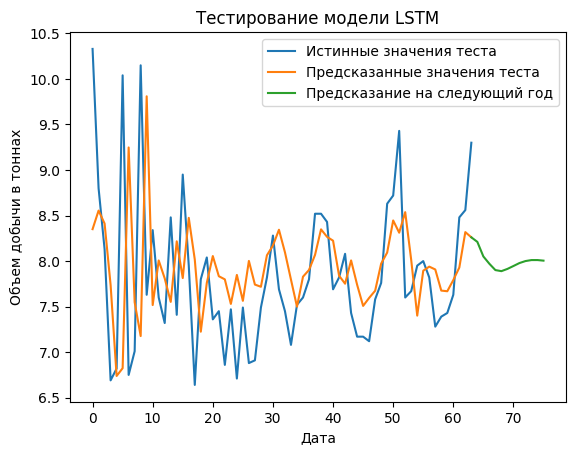

In [ ]:
# Выполняем предсказание на тестовой выборке
predictLSTM_test = regressorLSTM.predict(X_test)

# Формируем предсказание на еще один год
temp_x = X_test[-1:]
predictLSTM = []
for i in range(13):
    predictLSTM.append(regressorLSTM.predict(temp_x)[0, 0])
    temp_x = np.append(temp_x[0][1:], predictLSTM[-1]).reshape((1, 6))
predictLSTM = np.array(predictLSTM)

# Строим график для тестовой выборки и еще одного года
date = range(y_test.shape[0])
predict_date =  range(y_test.shape[0]-1, y_test.shape[0] + predictLSTM.shape[0]-1)
plt.plot(date, scaler.inverse_transform(y_test.reshape((y_test.shape[0], 1))))
plt.plot(date, scaler.inverse_transform(predictLSTM_test.reshape((y_test.shape[0], 1))))
plt.plot(predict_date, scaler.inverse_transform(predictLSTM.reshape((predictLSTM.shape[0], 1))))
plt.title('Тестирование модели LSTM')
plt.ylabel('Объем добычи в тоннах')
plt.xlabel('Дата')
plt.legend(['Истинные значения теста','Предсказанные значения теста', 'Предсказание на следующий год'], loc = 'upper right')
plt.show()

Пояснения по выбору гиперпараметров

Количество слоев: меньшее количество предсказывает общий тренд, но не учитывает сезонные и прочие изменения

Количество нейронов: подобрано с учетом оптимального соотношения времени обучения и объема модели

Функция активации на выходном нейроне: не смотря на то, что данные нормализованны от 0 до 1, предсказанные данные могут быть как больше 1, так и меньше 0, следуя тренду данных, поэтому используется функция допускающая подобные значения

Оптимизатор и функция ошибки: используются стандартные для задач предсказания временных рядов

Параметры компиляции: размер batch выбран, исходя из скорости обучения модели, количество эпох методом проб, был выбран момент после которого скорость обучения модели снижается и модель постепенно перестает обучаться и начинает переобучаться

Epoch 1/100
25/25 [==============================] - 6s 10ms/step - loss: 0.0590
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0374
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0374
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0362
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0314
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0285
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 11/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 12/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0313
Epoch 13/100
25/25 [============

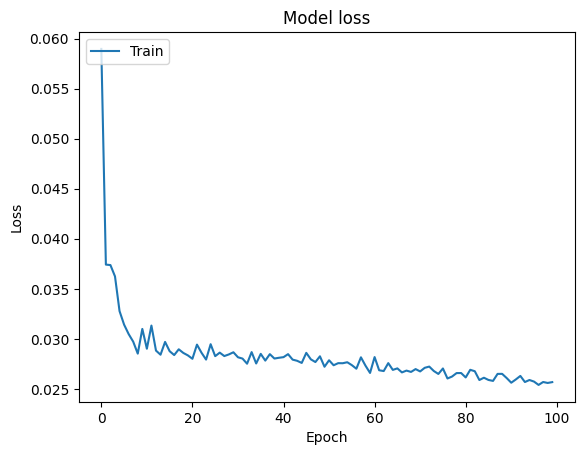

In [ ]:
# Инициализация нейронной сети
regressorGRU = Sequential()

# Добавляем входной слой GRU, устанавливаем разммер входных данных 6
regressorGRU.add(GRU(units=64,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))

# Добавляем Dropuot слой для предотвращения переобучения
regressorGRU.add(Dropout(0.2))

# Добавляем еще GRU слои
regressorGRU.add(GRU(units=64,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=64,
					activation='tanh'))

# Добавляем выходной слой с 1 нейронном
regressorGRU.add(Dense(units=1,
					activation='relu'))

# Компилируем модель
regressorGRU.compile(optimizer='adam',
					loss='mean_squared_error')

# Обучаем модель и засекаем время на обучение модели
time_start_fitGRU = time.time()
history = regressorGRU.fit(X_train,y_train,epochs=100,batch_size=16)
time_end_fitGRU = time.time()
regressorGRU.summary()

# Сохраняем из истории обучения показатели ошибки
lossGRU = history.history['loss']

# Строим график ошибки в процессе обучения
plt.plot(lossGRU)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

1/1 [==============================] - 0s 31ms/step


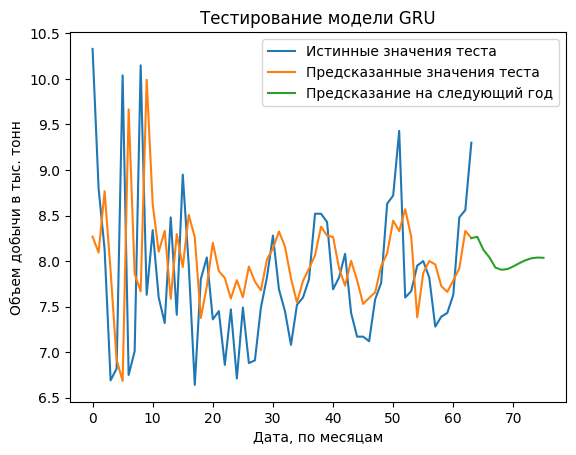

In [ ]:
# Выполняем предсказание на тестовой выборке
predictGRU_test = regressorGRU.predict(X_test)

# Формируем предсказание на еще один год
temp_x = X_test[-1:]
predictGRU = []
for i in range(13):
    predictGRU.append(regressorGRU.predict(temp_x)[0, 0])
    temp_x = np.append(temp_x[0][1:], predictGRU[-1]).reshape((1, 6))
predictGRU = np.array(predictGRU)

# Строим график для тестовой выборки и еще одного года
date = range(y_test.shape[0])
predict_date =  range(y_test.shape[0]-1, y_test.shape[0] + predictGRU.shape[0]-1)
plt.plot(date, scaler.inverse_transform(y_test.reshape((y_test.shape[0], 1))))
plt.plot(date, scaler.inverse_transform(predictGRU_test.reshape((y_test.shape[0], 1))))
plt.plot(predict_date, scaler.inverse_transform(predictGRU.reshape((predictGRU.shape[0], 1))))
plt.title('Тестирование модели GRU')
plt.ylabel('Объем добычи в тыс. тонн')
plt.xlabel('Дата, по месяцам')
plt.legend(['Истинные значения теста','Предсказанные значения теста', 'Предсказание на следующий год'], loc = 'upper right')
plt.show()

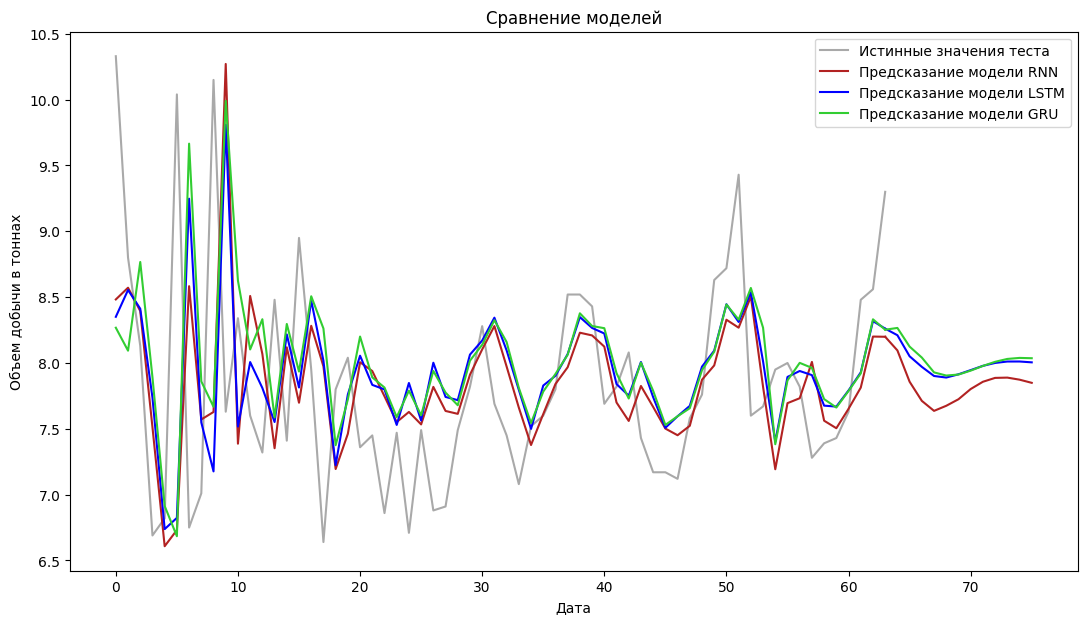

In [ ]:
# Строим сравнительные графики на тестовой выборке для моделей
# Определяем даты
date = range(y_test.shape[0])
predict_date =  range(y_test.shape[0]-1, y_test.shape[0] + predictRNN.shape[0]-1)

# Выставляем размер графика
figure = plt.figure()
figure.set_figwidth(13)
figure.set_figheight(7)

# Строим график для истинных значений тестовой выборки
plt.plot(date,
         scaler.inverse_transform(y_test.reshape((y_test.shape[0], 1))), color = 'darkgrey',
         label='Истинные значения теста')

# Строим график предсказаний RNN на тестовой выборке
plt.plot(date,
         scaler.inverse_transform(predictRNN_test.reshape((y_test.shape[0], 1))),
         color='firebrick', label='Предсказание модели RNN')
# Достраиваем предсказание за следующий год для RNN
plt.plot(predict_date,
         scaler.inverse_transform(predictRNN.reshape((predictRNN.shape[0], 1))),
         color='firebrick')

# Строим график предсказаний LSTM на тестовой выборке
plt.plot(date,
         scaler.inverse_transform(predictLSTM_test.reshape((y_test.shape[0], 1))),
         color='blue', label='Предсказание модели LSTM')
# Достраиваем предсказание за следующий год для LSTM
plt.plot(predict_date,
         scaler.inverse_transform(predictLSTM.reshape((predictLSTM.shape[0], 1))),
         color='blue')

# Строим график предсказаний GRU на тестовой выборке
plt.plot(date,
         scaler.inverse_transform(predictGRU_test.reshape((y_test.shape[0], 1))),
         color='limegreen', label='Предсказание модели GRU')
# Достраиваем предсказание за следующий год для GRU
plt.plot(predict_date,
         scaler.inverse_transform(predictGRU.reshape((predictGRU.shape[0], 1))),
         color='limegreen')

plt.title('Сравнение моделей')
plt.ylabel('Объем добычи в тоннах')
plt.xlabel('Дата')
plt.legend(loc = 'upper right')
plt.show()

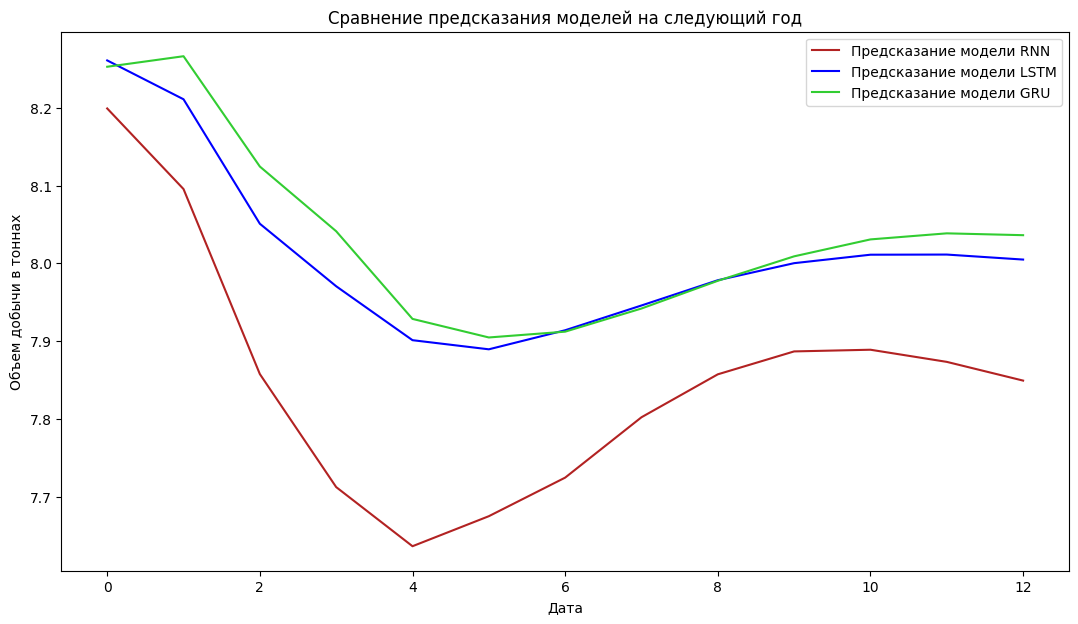

In [ ]:
# Строим сравнительные графики на следующий год для моделей
# Определяем даты
predict_date =  range(13)

# Выставляем размер графика
figure = plt.figure()
figure.set_figwidth(13)
figure.set_figheight(7)

# Строим график предсказания за следующий год для RNN
plt.plot(predict_date, scaler.inverse_transform(predictRNN.reshape((predictRNN.shape[0], 1))), color='firebrick', label='Предсказание модели RNN')

# Строим график предсказания за следующий год для LSTM
plt.plot(predict_date, scaler.inverse_transform(predictLSTM.reshape((predictLSTM.shape[0], 1))), color='blue', label='Предсказание модели LSTM')

# Строим график предсказания за следующий год для GRU
plt.plot(predict_date, scaler.inverse_transform(predictGRU.reshape((predictGRU.shape[0], 1))), color='limegreen', label='Предсказание модели GRU')

plt.title('Сравнение предсказания моделей на следующий год')
plt.ylabel('Объем добычи в тоннах')
plt.xlabel('Дата')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
print(f"Время обучение модели RNN:{time_end_fitRNN - time_start_fitRNN} секунд")
print(f"Время обучение модели LSTM:{time_end_fitLSTM - time_start_fitLSTM} секунд")
print(f"Время обучение модели GRU:{time_end_fitGRU - time_start_fitGRU} секунд")

Время обучение модели RNN:12.148884057998657 секунд
Время обучение модели LSTM:53.24931859970093 секунд
Время обучение модели GRU:37.982269287109375 секунд


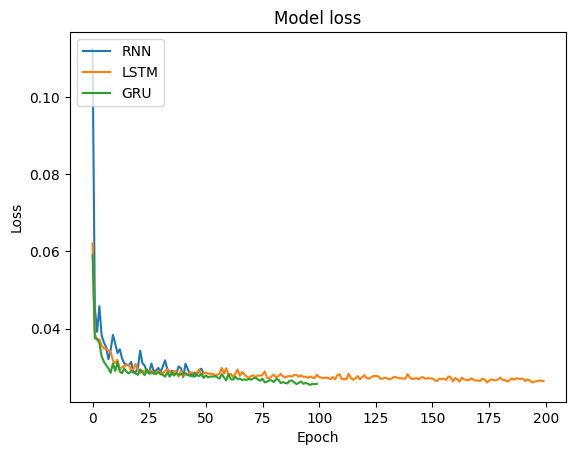

In [ ]:
# Строим график сравнения функции ошибки для каждой модели
# Из-за разного количества эпох график является не совсем иллюстративным
plt.plot(lossRNN)
plt.plot(lossLSTM)
plt.plot(lossGRU)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['RNN', 'LSTM', 'GRU'], loc = 'upper left')
plt.show()

In [ ]:
print(f"Ошибка модели RNN:{lossRNN[-1]}")
print(f"Ошибка модели LSTM:{lossLSTM[-1]}")
print(f"Ошибка модели GRU:{lossGRU[-1]}")

Ошибка модели RNN:0.028336461633443832
Ошибка модели LSTM:0.026416610926389694
Ошибка модели GRU:0.0256278607994318


In [ ]:
# Строим датафрейм из предсказанных данных на следующий год для каждой модели
df_result = pd.DataFrame({"RNN_predict": scaler.inverse_transform(predictRNN.reshape((predictRNN.shape[0], 1))).reshape(predictRNN.shape[0]),
                         "LSTM_predict": scaler.inverse_transform(predictLSTM.reshape((predictLSTM.shape[0], 1))).reshape(predictLSTM.shape[0]),
                         "GRU_predict": scaler.inverse_transform(predictGRU.reshape((predictGRU.shape[0], 1))).reshape(predictGRU.shape[0])})
df_result.round(2)

,RNN_predict,LSTM_predict,GRU_predict
0,8.20,8.26,8.25
1,8.10,8.21,8.27
2,7.86,8.05,8.12
3,7.71,7.97,8.04
4,7.64,7.90,7.93
5,7.67,7.89,7.90
6,7.72,7.91,7.91
7,7.80,7.95,7.94
8,7.86,7.98,7.98
9,7.89,8.00,8.01


Если бы в задаче требовалось определить лучшую модель для предсказания различных временных рядов с разными показателями, лучше бы подошла RNN из-за схожей точности, но значительно более быстрой обучаемостью на новых данных. Но так задача заключается в нахождении наиболее точной модели и предсказании наиболее точного прогноза для конкретного временного ряда лучше использовать предсказание модели LSTM, так как его ошибка меньше остальных, а значит ее прогноз более точный